In [1]:
from load_train_dump_segments import load_data, create_list_of_track_dicts, dump_tracks_to_pickles
from data_preprocessing_funcs import data_preprocess

In [2]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pandas as pd

In [3]:
train_path = 'MAFAT RADAR Challenge - Training Set V1'
full_dict = load_data(train_path)
pickle_folder_path = "../tracks_pickle_files/"

In [4]:
color_map_path = "../data_train/cmap.npy"
cm_data = np.load(color_map_path)
color_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [7]:
def plot_track_segments_and_full(track_data):
    num_segments = len(track_data['segment_id'])
    fig1, ax1 = plt.subplots(1, num_segments, figsize=(num_segments * 2, 5), sharey=True)
    
    for i in range(num_segments):
        ax1[i].imshow(track_data['iq_sweep_burst'][i], cmap=color_map)
        ax1[i].set_title(f"{track_data['segment_id'][i]},{track_data['snr_type'][i]}")
        
    fig1.tight_layout()
        
    fig2, ax2 = plt.subplots(1, 1, figsize=(12, 5))
    ax2.imshow(track_data['full_track_iq'], cmap=color_map)
    ax2.set_title(f"track: {track_data['track_id']}      target: {track_data['target_type']}")

In [8]:
tracks_data_list = create_list_of_track_dicts(full_dict, train_path, min_segments=5, num_tracks=30)

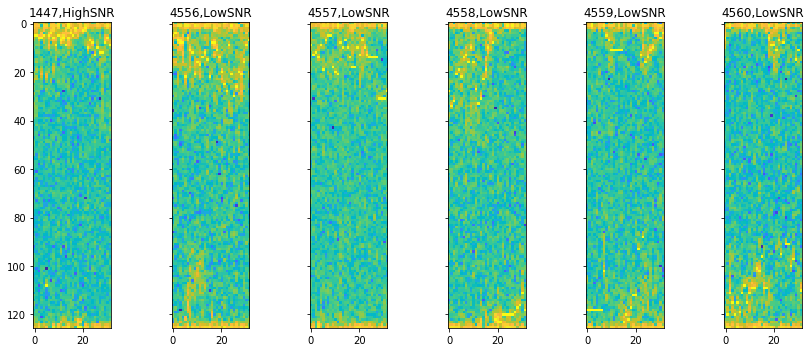

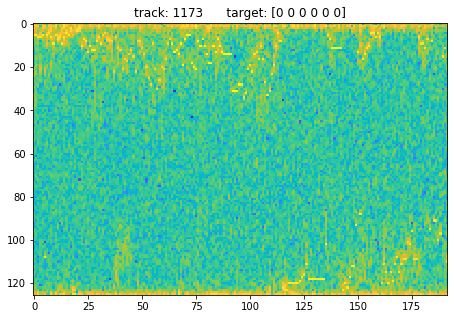

In [9]:
plot_track_segments_and_full(tracks_data_list[1])

In [10]:
dump_tracks_to_pickles(tracks_data_list, pickle_folder_path)

In [78]:
with open(pickle_folder_path +"track_31.pkl", 'rb') as data:
    output = pickle.load(data)

In [9]:
#output

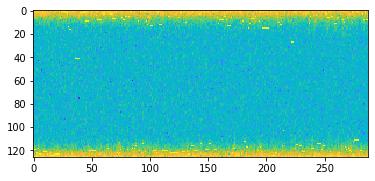

In [10]:
plt.imshow(output["full_track_iq"], cmap=color_map)

In [13]:
MODEL_PATH = r"..\transfer_learning_model.h5"
model = load_model(MODEL_PATH)

In [14]:
model.summary()

Model: "transfer_learning_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_15 (Functional)   (None, None, None, 512)   15304768  
_________________________________________________________________
flatten_4 (Flatten)          (None, 7168)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7169      
Total params: 15,311,937
Trainable params: 7,169
Non-trainable params: 15,304,768
_________________________________________________________________


In [15]:
x_test = output['iq_sweep_burst']

In [18]:
x_test = np.repeat(x_test[...,np.newaxis], 3, -1)

[0.0001476407,
 7.541387e-05,
 1.1734293e-05,
 0.000106413805,
 0.0004479587,
 2.1588454e-05,
 9.275352e-06,
 0.021358669,
 0.0031577349]

In [74]:
predicions = [pred[0] for pred in model.predict(x_test)]

In [22]:
output['iq_sweep_burst'][0].shape

(126, 32)

In [23]:
output.keys()

dict_keys(['segment_id', 'snr_type', 'doppler_burst', 'iq_sweep_burst', 'track_id', 'target_type', 'full_track_iq'])

In [83]:
plt.imsave("a.png", output['full_track_iq'], cmap=color_map)

In [ ]:
plt.imsave("a.png", output['iq_sweep_burst'][0], cmap=color_map)

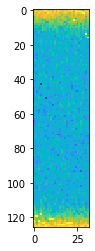

In [30]:
plt.imshow(output['iq_sweep_burst'][0], cmap=color_map)

In [94]:
df = pd.DataFrame(list(zip(output['segment_id'], output['snr_type'], output['target_type'],  predicions)), 
             columns=["segment_id", "snr_type","target", "predictions"])

In [98]:
df.T.to_dict()

{'segment_id': 14,
 'snr_type': 'HighSNR',
 'target': 0,
 'predictions': 0.00014764070510864258}

In [101]:
segment_data = df.reset_index().T.to_dict()

In [119]:
list(df.reset_index().T.to_dict().values())[0]

{'index': 0,
 'segment_id': 14,
 'snr_type': 'HighSNR',
 'target': 0,
 'predictions': 0.00014764070510864258}

In [109]:
segment_data

{0: {'index': 0,
  'segment_id': 14,
  'snr_type': 'HighSNR',
  'target': 0,
  'predictions': 0.00014764070510864258},
 1: {'index': 1,
  'segment_id': 15,
  'snr_type': 'HighSNR',
  'target': 0,
  'predictions': 7.541386730736122e-05},
 2: {'index': 2,
  'segment_id': 16,
  'snr_type': 'HighSNR',
  'target': 0,
  'predictions': 1.1734293366316706e-05},
 3: {'index': 3,
  'segment_id': 17,
  'snr_type': 'HighSNR',
  'target': 0,
  'predictions': 0.0001064138050423935},
 4: {'index': 4,
  'segment_id': 18,
  'snr_type': 'HighSNR',
  'target': 0,
  'predictions': 0.00044795870780944824},
 5: {'index': 5,
  'segment_id': 19,
  'snr_type': 'HighSNR',
  'target': 0,
  'predictions': 2.1588453819276765e-05}}

In [82]:
df.to_csv('track.csv')

In [104]:
<img src="{{ url_for('static', filename= 'segments_images/' + segment.image_name ) }}" >

SyntaxError: invalid syntax (<ipython-input-104-143ccec0da64>, line 1)

In [105]:
posts = [
    {
        'student': "Inbar Shirizly",
        "location": "Tel-aviv",
        "date_posted": "19/8/1993",
        "role_searcing": "Data Scientist",
        "description": """Data Scientist full of motivation, diligent, and autodidact.
                          Have experience in high-pressure work environments with tight
                          schedules - 4.5 years served in IDF intelligence unit 81 as a mechanical engineer"""
    },
    ]


In [108]:
posts

[{'student': 'Inbar Shirizly',
  'location': 'Tel-aviv',
  'date_posted': '19/8/1993',
  'role_searcing': 'Data Scientist',
  'description': 'Data Scientist full of motivation, diligent, and autodidact.\n                          Have experience in high-pressure work environments with tight\n                          schedules - 4.5 years served in IDF intelligence unit 81 as a mechanical engineer'}]